# INST414 Final Project

Objective - Develop machine learning classifiers to accuratley predict the churn of telecom users (to identify people who will and will not renew their contract)

Dataset - Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service. Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave.The dataset is from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment. 

The data contains 5987 rows with 22 attributes. 

Features: customerID, gender, Senior Citizen, Partner, Dependents, tenure, Phone service, Multiple lines, Internet service, Online security, online backup, device protection, tech support, streaming tv, contract, paperless billing, payment method, monthly charges, total charges, churn

Contributors - Quinn Cummings, Joe McCarthy, Angad Dhillon, Daniel Nkengafac, Mia Garcia


In [11]:
#package imports
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
import math
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#Pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms

#logistic regression
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.dummy import DummyClassifier

#Keras
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense

#XGBoost
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [7]:
#EDA (data vizualizations)
data_raw = pd.read_csv("telecom_users.csv")
data_raw.head(3)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes


In [8]:
data_raw.nunique() #check unique values
data_raw.dtypes #check data types

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

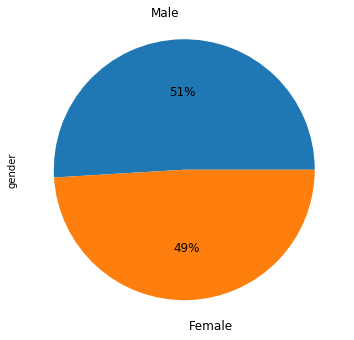

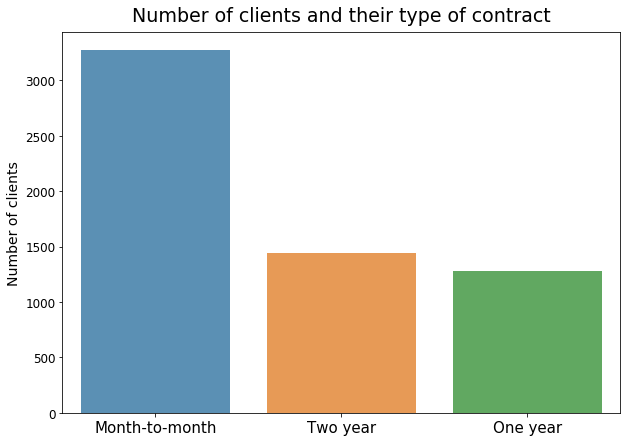

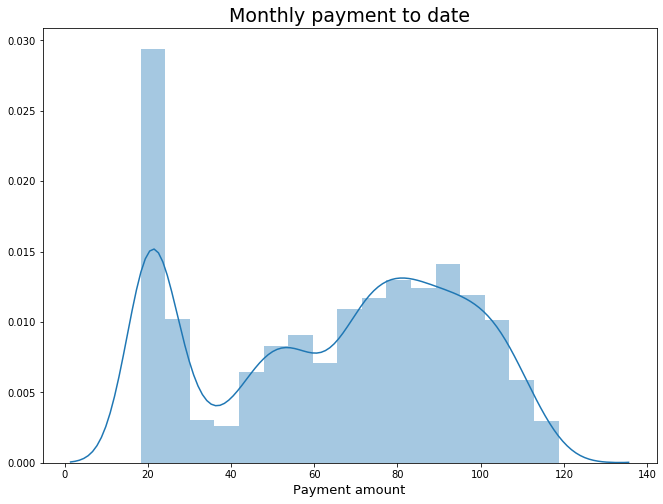

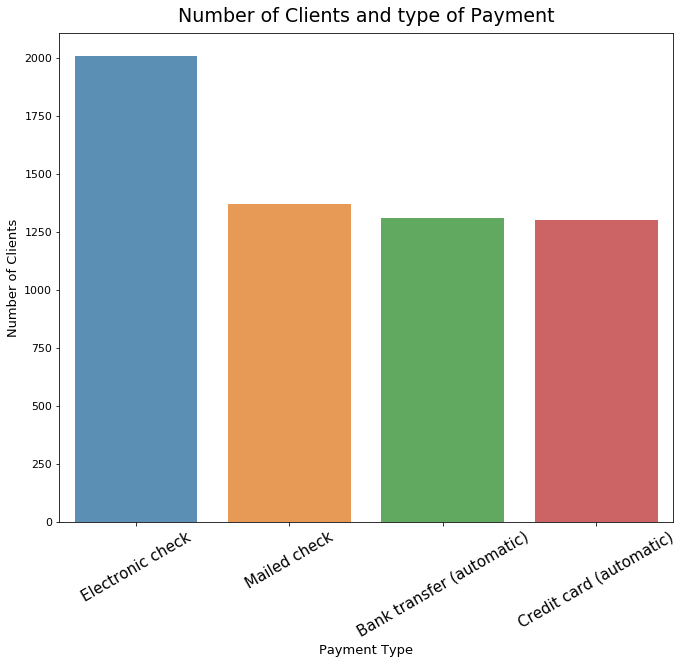

In [9]:
gender = data_raw['gender'].value_counts()
plt.figure(figsize=(8, 6))
plot_1 = gender.plot.pie(fontsize=12, autopct='%1.0f%%', labeldistance=1.2, radius=1)
plt.show()

contract_1 = data_raw['Contract'].value_counts()
plt.figure(figsize=(10, 7))
sns.barplot(x=contract_1.index, y=contract_1.values, alpha=0.8)
plt.title('Number of clients and their type of contract', fontsize=19, pad=11)
plt.ylabel('Number of clients', fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

montly_charges_1 = data_raw['MonthlyCharges']
plt.figure(figsize=(11, 8))
sns.distplot(montly_charges_1).set(ylabel=None, xlabel=None)
plt.title('Monthly payment to date', fontsize=19)
plt.xlabel('Payment amount', fontsize=13)
plt.show()

paymentMethod_1 = data_raw['PaymentMethod'].value_counts()
plt.figure(figsize=(11, 9))
sns.barplot(x=paymentMethod_1.index, y=paymentMethod_1.values, alpha=0.8)
plt.title('Number of Clients and type of Payment', fontsize=19, pad=11)
plt.ylabel('Number of Clients', fontsize=13)
plt.xlabel('Payment Type', fontsize=13)
plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=11)
plt.show()

# Data Wrangling

In [ ]:
#import data -> clean data -> split data for test and train
data = data_raw

#drop unneeded columns
data.drop(['Unnamed: 0', 'customerID', 'TotalCharges'], axis = 1, inplace = True)

#Translates yes->1 and No->0 and Male->1 and Female->0 for the given columns
yes_no_cols = ['Churn','Partner','Dependents','PhoneService', 'PaperlessBilling']
for col in yes_no_cols:
    data[col] = data[col].apply(lambda x: 0 if x=='No' else 1 )
data['gender'] = data['gender'].apply(lambda x: 0 if x=='Female' else 1 )   

#Create dummies for categorical columns
data = pd.get_dummies(data, columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                                       'OnlineBackup', 'DeviceProtection','TechSupport', 
                                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod' ])

#split the data for test and train
X = data.loc[:, data.columns != 'Churn']
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
data.head(3)

# Pytorch Model

In [ ]:
#PyTorch
class DataTensors(Dataset):
    def __init__(self, X, y):
        self.x = torch.from_numpy(X.to_numpy( dtype=np.float32))
        self.y = torch.from_numpy(y.to_numpy( dtype=np.long))
        self.n_samples = X.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

class NN(nn.Module):
    
    def __init__(self, input_size, hidden1_size, num_classes):
        super(NN,self).__init__()
        self.fc1 = nn.Linear(input_size,hidden1_size)
        self.fc2 = nn.Linear(hidden1_size,num_classes)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
#Building model  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NN(input_size = 39,hidden1_size = 20, num_classes = 2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.02)

dataset = DataTensors(X_train, y_train)
data_loader = DataLoader(dataset = dataset, batch_size= len(dataset), shuffle=True)

#Training model
for epoch in range(10):
    for data2, targets in data_loader:
        data2 = data2.to(device=device)
        targets = targets.to(device=device)
        
        data2 = data2.reshape(data2.shape[0], -1)
        
        scores = model(data2)
        loss = criterion(scores,targets)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()

#Testing model
testset = DataTensors(X_test, y_test)
test_loader = DataLoader(dataset = testset, batch_size = len(testset), shuffle=True)

num_correct = 0
num_samples = 0
model.eval()

for x, y in test_loader:
    x = x.to(device=device)
    y = y.to(device=device)
    x = x.reshape(x.shape[0], -1)
    
    outputs = model(x)
    _, outputs = torch.max(outputs.data, 1)
    
    num_correct += (outputs == y).sum()
    num_samples += outputs.size(0)
print('model accuracy: {}/{} OR {}'.format(num_correct, num_samples, num_correct/num_samples))

# Logistic Regression Model

In [ ]:
#Logistic Regression - imports are in section 1, data is in sections 2/3
LogReg = LogisticRegression()
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)
print(classification_report(y_test, LogReg.predict(X_test)))
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat
categories = [0,1] 
fig, ax = plt.subplots()

#heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion matrix', y=1.1)
plt.ylabel('actual')
plt.xlabel('predicted')
dummy_clf = DummyClassifier(strategy="most_frequent")
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

# logistic regression chart
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=2, label='area = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='-')
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('logistic regression graph')
plt.legend(loc="lower right")
plt.show()

# XGBoost Model

In [10]:
#XGBoost
X = data.loc[:, data.columns != 'Churn']
y = data.Churn
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=0)
#building the model & printing the score
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/angaddhillon/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/angaddhillon/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [ ]:
xgb_model.plot.importance(
  importance_matrix = NULL,
  top_n = NULL,
  measure = NULL,
  rel_to_first = FALSE,
  left_margin = 10,
  cex = NULL,
  plot = TRUE,)

# Keras Model

In [ ]:
#Keras pt1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

In [ ]:
#Keras pt2
y_pred = model.predict_classes(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Decision Tree & Random Forest Model

In [ ]:
#Descision tree begin
#first ten row -- churn
y[0:10]

In [ ]:
#decision tree classifier
dtree = DecisionTreeClassifier(criterion='entropy', random_state=99)

#fitting data 
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
accuracy_score(y_test, y_pred)

#accuracy score
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
accuracy

In [ ]:
#data visualization
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=dtree, max_depth= 3,fontsize=12);

In [ ]:
#Descison tree pt.2 Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=100,random_state=11)
rf_cl.fit(X_train, y_train)
rf_pred= rf_cl.predict(X_test)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

# Conclusion

The accuracy shown by each model are as follow:

Py-torch model-0.74</br><p>
Linear Regression model-0.78<br><p>
Keras model-0.78<br><p>
Xgboost model-(training set-0.83, test set-0.79)<br><p>
Decision tree model-(classifier)-0.64, Part2 (random forest)-0.8<br><p>
    
All in all, the decision tree random forest classifier came out to be most accurate with 0.8 or 80% accuracy. Most model were predicting accuracy around 74~79% which is very close to one another.<br><p>
    
Challenges-We had some issues organizing libraries but we are able to sort it out. The Keras model accuracy was initially questionable because we didn't if it was correct or not. It is accurate now.<br><p>